In [1]:
import pandas as pd
import numpy as np
import matplotlib
import matplotlib.pyplot as plt

In [2]:
names =[
    't',                                  # Time (secs)
    'q1', 'q2', 'q3',                     # Joint angle   (rads)
    'dq1', 'dq2', 'dq3',                  # Joint velocity (rads/sec)
    'I1', 'I2', 'I3',                     # Motor current (A)
    'eps21', 'eps22', 'eps31', 'eps32',   # Strain gauge measurements ($\mu$m /m )
    'ddq1', 'ddq2', 'ddq3'
    
]
df = pd.read_csv('https://raw.githubusercontent.com/ece5307au21/lab2-waterbowen/0a776de25ca53136989e6016d313aab23c621c2d/'+'exp1.csv?token=AVLYCNOB6IQDSRQCSWJF3ATBII3Q2',
                 header=None,delim_whitespace=False,names=names,na_values='?',index_col=0)


In [3]:
df.head(6)

,q1,q2,q3,dq1,dq2,dq3,I1,I2,I3,eps21,eps22,eps31,eps32,ddq1,ddq2,ddq3
t,,,,,,,,,,,,,,,,
0.00,-0.000007,2.4958,-1.1345,-7.882100e-21,-4.940656e-321,3.913100e-29,-0.081623,-0.40812,-0.30609,-269.25,-113.20,3.5918,1.57860,-9.904900e-19,-6.210306e-319,4.917400e-27
0.01,-0.000007,2.4958,-1.1345,-2.258200e-21,-4.940656e-321,2.626200e-31,-0.037411,-0.37241,-0.26698,-270.91,-116.05,1.4585,-1.73980,4.248100e-19,-1.766878e-319,-1.381100e-27
0.02,-0.000007,2.4958,-1.1345,-6.469800e-22,-4.940656e-321,1.762500e-33,-0.066319,-0.40302,-0.31459,-269.25,-112.97,3.5918,0.86753,3.233800e-19,-4.990557e-320,-4.117300e-28
0.03,-0.000007,2.4958,-1.1345,-1.853600e-22,-4.940656e-321,1.182800e-35,-0.068020,-0.43703,-0.28398,-269.97,-114.39,1.6956,-0.08059,1.500500e-19,-1.394253e-320,-1.173100e-28
0.04,-0.000007,2.4958,-1.1345,-5.310600e-23,-4.940656e-321,-5.270900e-03,-0.052715,-0.40472,-0.30779,-269.97,-114.15,3.1177,0.86753,5.932400e-20,-3.581976e-321,-3.770800e-01
0.05,-0.000007,2.4958,-1.1345,-1.521500e-23,-4.940656e-321,3.252600e-04,-0.088425,-0.42342,-0.29589,-269.25,-114.15,2.4066,-0.08059,2.164600e-20,-1.141292e-321,2.930300e-01


In [4]:
y =np.array(df['I2'])

In [5]:
x=np.array(df.index)

In [6]:
import matplotlib
import matplotlib.pyplot as plt

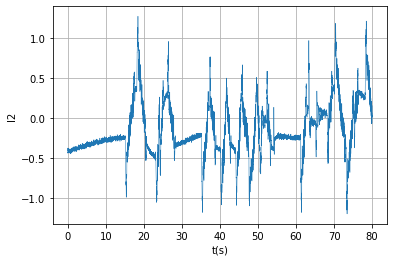

In [27]:

plt.plot(x,y,lw=0.5)
plt.xlabel('t(s)')
plt.ylabel('I2')
plt.grid(True)

In [8]:
ytrain =np.array(df['I2'])

In [9]:
Xtrain =np.array(df [['q2','dq2','eps21', 'eps22', 'eps31', 'eps32','ddq2']])

In [10]:
from sklearn import linear_model

In [11]:
nsamp, natt = Xtrain.shape
print("num samples={0:d}  num attributes={1:d}".format(nsamp,natt))

num samples=8000  num attributes=7


In [12]:

ym = np.mean(y)
syy = np.mean((y-ym)**2)
Rsq = np.zeros(natt)
beta0 = np.zeros(natt)
beta1 = np.zeros(natt)
for j in range(natt):
    xm = np.mean(Xtrain[:,j])
    sxy = np.mean((Xtrain[:,j]-xm)*(y-ym))
    sxx = np.mean((Xtrain[:,j]-xm)**2)
    beta1[j] = sxy/sxx
    beta0[j] = ym - beta1[j]*xm
    Rsq[j] = (sxy)**2/sxx/syy
    
    print("j={0:1d} R^2={1:f} beta0={2:f} beta1={3:f}".format(j,Rsq[j],beta0[j],beta1[j]))

j=0 R^2=0.620074 beta0=0.580015 beta1=-0.352189
j=1 R^2=0.150979 beta0=-0.151531 beta1=0.213376
j=2 R^2=0.705385 beta0=0.039449 beta1=0.001264
j=3 R^2=0.697153 beta0=0.017028 beta1=0.002681
j=4 R^2=0.334404 beta0=-0.085369 beta1=0.013548
j=5 R^2=0.186653 beta0=-0.123289 beta1=0.034811
j=6 R^2=0.345261 beta0=-0.154775 beta1=0.140132


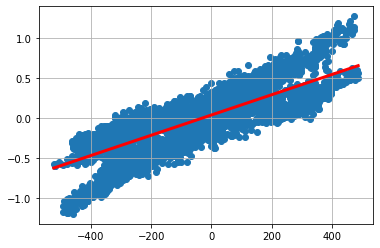

In [13]:
imax = np.argmax(Rsq)

# Regression line over the range of x values
xmin = np.min(Xtrain[:,imax])
xmax = np.max(Xtrain[:,imax])
ymin = beta0[imax] + beta1[imax]*xmin
ymax = beta0[imax] + beta1[imax]*xmax
plt.plot([xmin,xmax], [ymin,ymax], 'r-', linewidth=3)

# Scatter plot of points
plt.scatter(Xtrain[:,imax],y)
plt.grid()

In [14]:
X_tr = Xtrain[:,:]     
y_tr = y[:] 

In [15]:
regr = linear_model.LinearRegression()
regr.fit(X_tr,y_tr)

LinearRegression()

In [16]:
regr.intercept_

-0.08408083770450345

In [17]:
regr.coef_

array([ 0.06255018,  0.20584896,  0.00118784,  0.00044457, -0.0031362 ,
        0.00603298,  0.05487097])

In [18]:
y_tr_pred = regr.predict(X_tr)
nRSS_tr = np.mean((y_tr_pred-y_tr)**2)
Rsq_tr = 1-nRSS_tr/(np.std(y_tr)**2)
print("R^2 =            {0:f}".format(Rsq_tr))

R^2 =            0.904167


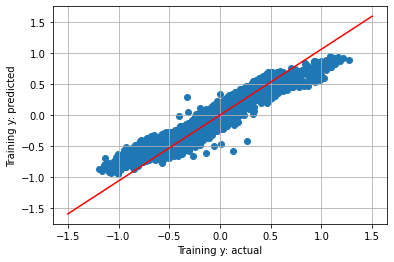

In [37]:
plt.scatter(y_tr,y_tr_pred)
plt.plot()
plt.xlabel('Training y: actual')
plt.ylabel('Training y: predicted')
plt.plot([-1.5,1.5],[-1.6,1.6],'r')
plt.grid()

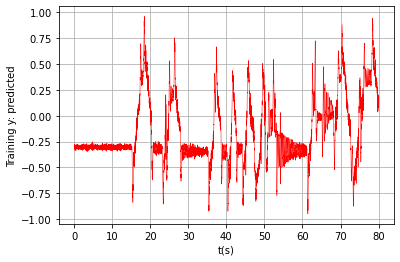

In [28]:
plt.plot(x,y_tr_pred,lw=0.5,color='red')
plt.plot()
plt.xlabel('t(s)')
plt.ylabel('Training y: predicted')
plt.grid()

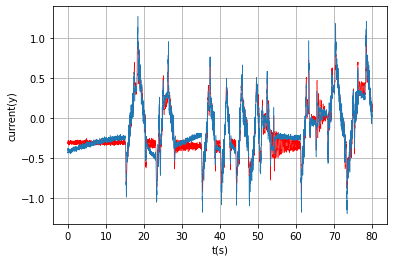

In [31]:
plt.plot(x,y_tr_pred,lw=0.5,color='red')
plt.plot()
plt.xlabel('t(s)')
plt.ylabel('Training y: predicted')
plt.grid()
plt.plot(x,y,lw=0.5)
plt.xlabel('t(s)')
plt.ylabel('current(y)')
plt.grid(True)

In [22]:
names =[
    't',                                  # Time (secs)
    'q1', 'q2', 'q3',                     # Joint angle   (rads)
    'dq1', 'dq2', 'dq3',                  # Joint velocity (rads/sec)
    'I1', 'I2', 'I3',                     # Motor current (A)
    'eps21', 'eps22', 'eps31', 'eps32',   # Strain gauge measurements ($\mu$m /m )
    'ddq1', 'ddq2', 'ddq3'
    
]
df = pd.read_csv('https://raw.githubusercontent.com/ece5307au21/lab2-waterbowen/main/'+'exp2.csv?token=AVLYCNN6GNWCKZOB4F5HMLLBIOENY',
                 header=None,delim_whitespace=False,names=names,na_values='?',index_col=0)

In [23]:
df.head(6)

,q1,q2,q3,dq1,dq2,dq3,I1,I2,I3,eps21,eps22,eps31,eps32,ddq1,ddq2,ddq3
t,,,,,,,,,,,,,,,,
0.00,-0.000007,1.9024,0.26063,-0.000364,4.940656e-321,0.012596,-0.096928,-0.15134,-0.017005,-130.83,-41.856,-6.3635,5.13410,-0.045712,6.210306e-319,1.582900
0.01,0.000013,1.9024,0.26073,0.000739,4.940656e-321,0.012095,-0.028908,-0.11903,-0.020406,-138.18,-51.100,-14.6590,-5.05820,0.125580,1.766878e-319,0.414660
0.02,-0.000007,1.9024,0.26086,-0.000580,4.940656e-321,0.011596,-0.059517,-0.13944,-0.047614,-139.36,-51.812,-14.6590,-5.29520,-0.130080,4.990557e-320,0.082286
0.03,0.000013,1.9024,0.26099,0.001409,4.940656e-321,0.013933,-0.079923,-0.15304,-0.023807,-135.57,-48.019,-11.3410,-0.79168,0.213010,1.394253e-320,0.190650
0.04,-0.000007,1.9024,0.26110,-0.001273,4.940656e-321,0.010793,-0.025507,-0.12924,-0.006802,-135.81,-49.204,-12.0520,-2.21390,-0.276490,3.581976e-321,-0.170400
0.05,-0.000007,1.9024,0.26124,0.001928,4.940656e-321,0.011915,-0.083324,-0.14964,-0.034010,-139.60,-53.471,-16.0820,-6.95450,0.323560,1.141292e-321,0.031745


In [24]:
ytest =np.array(df['I2'])
Xtest =np.array(df[['q2','dq2','eps21', 'eps22', 'eps31', 'eps32','ddq2']])
X_test = Xtest[:,:]
y_test = ytest[:]
y_test_pred = regr.predict(X_test)
nRSS_test = np.mean((y_test_pred-y_test)**2)
Rsq_test = 1-nRSS_test/(np.std(y_test)**2)
print("R^2 =            {0:f}".format(Rsq_test))

R^2 =            0.873220


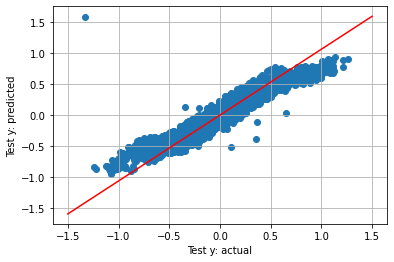

In [36]:
plt.scatter(y_test,y_test_pred)
plt.plot()
plt.xlabel('Test y: actual')
plt.ylabel('Test y: predicted')
plt.plot([-1.5,1.5],[-1.6,1.6],'r')
plt.grid()